<a href="https://colab.research.google.com/github/Viny2030/pennylane/blob/master/Chapter_02_Qiskit_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 2 - The Tools of the Trade in Quantum Computing - Qiskit Code

*Note*: You may skip the following two cells if you have alredy installed the right versions of all the libraries mentioned in *Appendix D*. This will likely NOT be the case if you are running this notebook on a cloud service such as Google Colab.

In [2]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00


In [3]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=7269537a55d31abfa12c65e2b0f1c84384f85e3752f6383fa4e245a5df8e5072
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [4]:
from qiskit import *

In [5]:
qreg1 = QuantumRegister(size = 2, name = "qrg1")
qreg2 = QuantumRegister(1, "qrg2")
creg = ClassicalRegister(1, "oldschool")

qc = QuantumCircuit(qreg1, creg, qreg2)

creg = ClassicalRegister(1, "oldschool"): Esta línea es crucial y crea un registro clásico.

ClassicalRegister: La clase para un registro de bits clásicos.

1: El número de bits clásicos en este registro.

"oldschool": El nombre del registro.

En un circuito cuántico, necesitas bits clásicos para almacenar los resultados de tus mediciones de los qubits. Por ejemplo, si mides un qubit y el resultado es ∣0⟩, lo guardas como un 0 en el registro clásico.

qc = QuantumCircuit(qreg1, creg, qreg2): Finalmente, esta línea une todos los registros para crear el circuito cuántico completo.

QuantumCircuit: La clase que representa un circuito cuántico.

qreg1, creg, qreg2: Los registros se pasan en el orden en que quieres que aparezcan en el circuito. En este caso, el circuito tendrá 3 qubits en total (dos de qreg1 y uno de qreg2) y un bit clásico.

In [6]:
qc.draw()

qrg1_0: 
             
     qrg1_1: 
             
       qrg2: 
             
oldschool: 1/

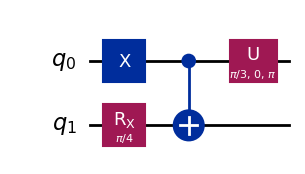

In [7]:
import numpy as np

qc = QuantumCircuit(2) # Initialise the circuit.

# We can now apply the gates sequentially.
qc.x(0)
qc.rx(np.pi/4, 1)
qc.cx(0, 1)
qc.u(np.pi/3, 0, np.pi, 0)

qc.draw("mpl")

In [10]:
!pip install --upgrade qiskit
!pip install --upgrade qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 72.5 MB/s eta 0:00:00


In [13]:
from qiskit_aer import AerSimulator

In [14]:
sim = AerSimulator()
sim_GPU = AerSimulator(device = 'GPU')

In [17]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.measure(range(2), range(2))

job = transpile(qc, sim, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'01': 508, '00': 516}


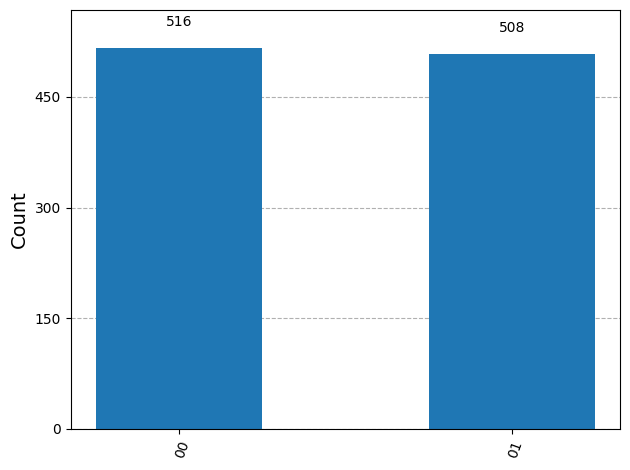

In [18]:
from qiskit.visualization import *
plot_histogram(counts)

In [20]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.save_statevector()
qc.measure(0,0)
qc.measure(1,1)

result = execute(qc, sim, shots = 1024).result()
sv = result.get_statevector()
print(sv)
counts = result.get_counts()
print(counts)

Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2))
{'01': 518, '00': 506}


In [22]:
sim_u = AerSimulator(method = 'unitary')

qc = QuantumCircuit(1)
qc.h(0)
qc.save_unitary()

result = sim_u.run(qc).result()
U = result.get_unitary(decimals = 4)
print(U)

Operator([[ 0.7071+0.j,  0.7071-0.j],
          [ 0.7071+0.j, -0.7071+0.j]],
         input_dims=(2,), output_dims=(2,))


*Note*: In the following cell, you need to replace "1234" with your actual IBM token. Refer to *Appendix D* in the book for instructions on how to create an account and get your token. Be very careful not to disclose your token to anyone!

In [23]:
ibm_token="1234"
IBMQ.save_account(ibm_token)

NameError: name 'IBMQ' is not defined

In [ ]:
provider = IBMQ.load_account()
print(provider.backends(simulator = False))

In [ ]:
dev_list = provider.backends(
    filters = lambda x: x.configuration().n_qubits >= 5,
    simulator = False)

In [ ]:
from qiskit.providers.ibmq import *
dev = least_busy(dev_list)

In [ ]:
from qiskit.providers.ibmq.job import job_monitor

# Let us set up a simple circuit.
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()

# First, we run the circuit using the statevector simulator.
sim = AerSimulator()
result = execute(qc, sim, shots = 1024).result()
counts_sim = result.get_counts()

# Now we run it on the real device that we selected before.
job = execute(qc, dev, shots = 1024)
job_monitor(job)

result = job.result()
counts_dev = result.get_counts()

In [ ]:
print(counts_sim)
print(counts_dev)